In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
tips = pd.read_csv('/home/saad/Downloads/tips.csv')
titanic = sns.load_dataset('titanic')
flight = sns.load_dataset('flights')
iris = sns.load_dataset('iris')

In [3]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
199,13.51,2.00,Male,Yes,Thur,Lunch,2
203,16.40,2.50,Female,Yes,Thur,Lunch,2
238,35.83,4.67,Female,No,Sat,Dinner,3
77,27.20,4.00,Male,No,Thur,Lunch,4
75,10.51,1.25,Male,No,Sat,Dinner,2


In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
flight.sample(5)

,year,month,passengers
82,1955,Nov,237
100,1957,May,355
46,1952,Nov,172
73,1955,Feb,233
142,1960,Nov,390


In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Scatter Plot(Numerical-Numerical)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

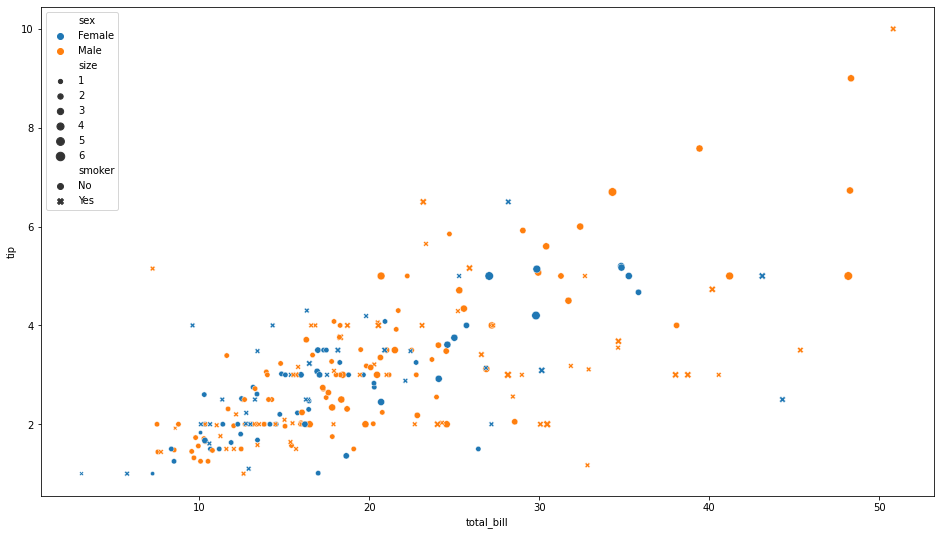

In [7]:
plt.figure(figsize=(16,9))
sns.scatterplot(tips['total_bill'], tips['tip'], hue=tips['sex'], style=tips['smoker'], size=tips['size'])
plt.legend(loc=2)

## bar Plot(Numerical-Categorical)

<AxesSubplot:xlabel='pclass', ylabel='age'>

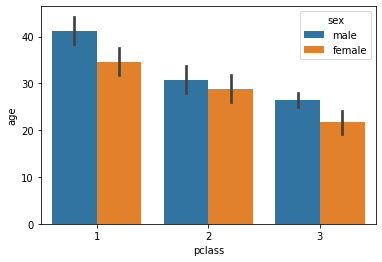

In [8]:
sns.barplot(titanic['pclass'], titanic['age'], hue=titanic['sex'])
# in this plot black line shows the confidence intervel

## BoxPlot(Numerical-Categorical)

<AxesSubplot:xlabel='sex', ylabel='age'>

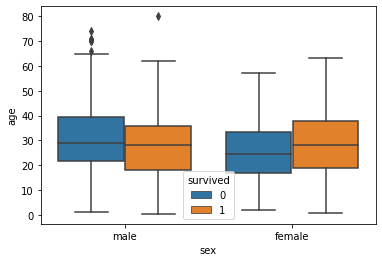

In [9]:
sns.boxplot(titanic['sex'], titanic['age'], hue=titanic['survived'])

## distplot(Numerical-Categorical)

<AxesSubplot:xlabel='age', ylabel='Density'>

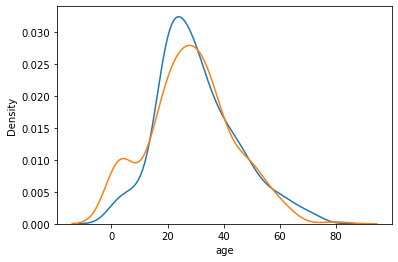

In [10]:
sns.distplot(titanic[titanic['survived']==0]['age'], hist=False) # those people who were not survived
sns.distplot(titanic[titanic['survived']==1]['age'], hist=False) # those people who were survived

<AxesSubplot:xlabel='age', ylabel='Density'>

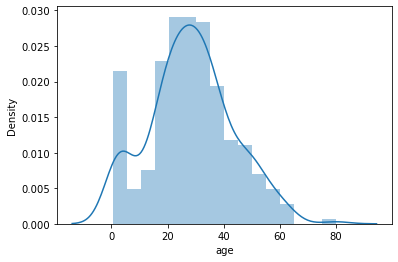

In [11]:
sns.distplot(titanic[titanic['survived']==1]['age']) # those people who were survived

## Heatmap (Categorical-Categorical)

In [12]:
pd.crosstab(titanic['pclass'], titanic['survived'])

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [13]:
136+80

216

In [14]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='pclass'>

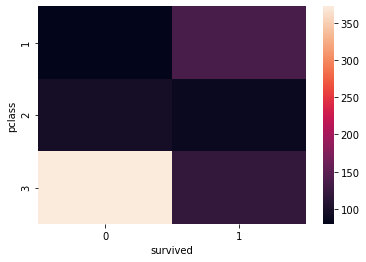

In [15]:
sns.heatmap(pd.crosstab(titanic['pclass'], titanic['survived']))

In [25]:
titanic.groupby('embark_town')['survived'].mean()*100

embark_town
Cherbourg      55.357143
Queenstown     38.961039
Southampton    33.695652
Name: survived, dtype: float64

## Cluster map (Categorical-Categorical)

In [28]:
titanic.groupby('sibsp')['survived'].mean()*100

sibsp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: survived, dtype: float64

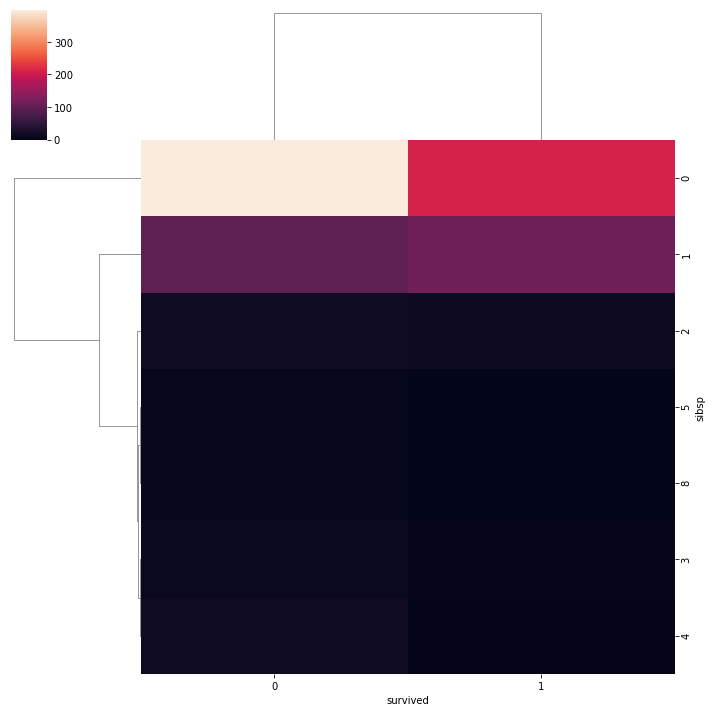

In [30]:
sns.clustermap(pd.crosstab(titanic['sibsp'], titanic['survived']))
# in this the lines are dendograms it captures the hierarchical relation in the data

## Pairplot

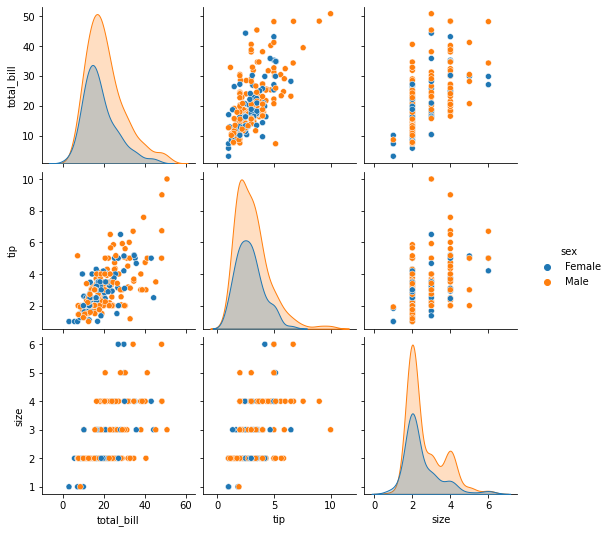

In [33]:
sns.pairplot(tips, hue='sex')

## Lineplot(Numerical-Numerical)

In [45]:
flight.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='passengers'>

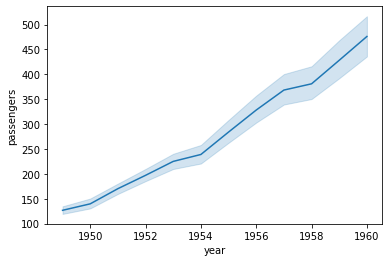

In [38]:
sns.lineplot(flight['year'], flight['passengers'],)

In [55]:
new = flight.groupby('year').sum().reset_index()

<AxesSubplot:xlabel='year', ylabel='passengers'>

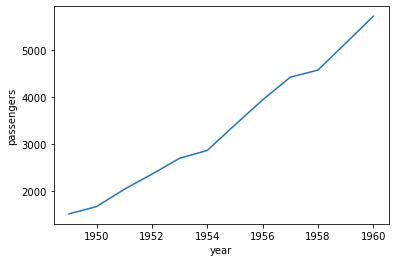

In [56]:
sns.lineplot(new['year'], new['passengers'])

<AxesSubplot:xlabel='year', ylabel='month'>

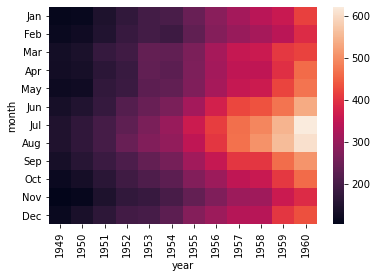

In [58]:
sns.heatmap(flight.pivot_table(values='passengers', index='month', columns='year'))

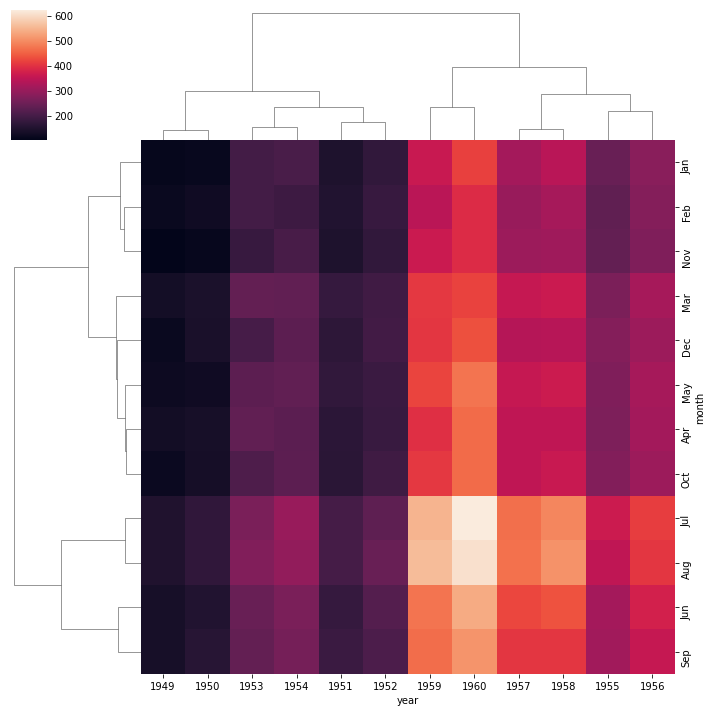

In [59]:
sns.clustermap(flight.pivot_table(values='passengers', index='month', columns='year'))